<a href="https://colab.research.google.com/github/Farah-Amalia/Rock-Paper-Scissors-Image-Classification/blob/main/Rock_Paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock Paper Scissors Image Classification

Student name: Farah Fajrina Amalia

Profile link: https://www.dicoding.com/users/farah_-_l3j1

## Loading data and packages

In [1]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-14 08:27:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  1.98MB/s    in 95s     

2021-05-14 08:28:54 (3.23 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
from keras.callbacks import ReduceLROnPlateau

## Data preparation

In [6]:
# file extraction

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')

In [20]:
# generate data (train and validation)

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.4)

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(100,150),
        batch_size=32,
        class_mode='categorical',
        subset='training')
 
validation_generator = validation_datagen.flow_from_directory(
        train_dir, 
        target_size=(100,150), 
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Model construction

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:
# compile model with 'adam' optimizer and 'categorical_crossentropy' loss function 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,  
    epochs=10,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction]
)

Epoch 1/10
42/42 [==============================] - 23s 533ms/step - loss: 0.2091 - accuracy: 0.9330 - val_loss: 0.3506 - val_accuracy: 0.8467
Epoch 2/10
42/42 [==============================] - 22s 533ms/step - loss: 0.1935 - accuracy: 0.9384 - val_loss: 0.2060 - val_accuracy: 0.9256
Epoch 3/10
42/42 [==============================] - 23s 534ms/step - loss: 0.1658 - accuracy: 0.9414 - val_loss: 0.2431 - val_accuracy: 0.9062
Epoch 4/10
42/42 [==============================] - 22s 532ms/step - loss: 0.1415 - accuracy: 0.9444 - val_loss: 0.1492 - val_accuracy: 0.9634
Epoch 5/10
42/42 [==============================] - 23s 534ms/step - loss: 0.1431 - accuracy: 0.9551 - val_loss: 0.1489 - val_accuracy: 0.9588
Epoch 6/10
42/42 [==============================] - 23s 535ms/step - loss: 0.1357 - accuracy: 0.9612 - val_loss: 0.1515 - val_accuracy: 0.9668
Epoch 7/10
42/42 [==============================] - 23s 536ms/step - loss: 0.1168 - accuracy: 0.9642 - val_loss: 0.1440 - val_accuracy: 0.9622

## Model evaluation

In [25]:
# function for plotting accuracy and loss

def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

In [26]:
# function for model evaluation 

def evaluate(model):

  validation_generator = train_datagen.flow_from_directory(
          train_dir, 
          target_size=(100,150), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_train_samples = 1314
  num_of_test_samples = 874

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['Rock', 'Paper', 'Scissors']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

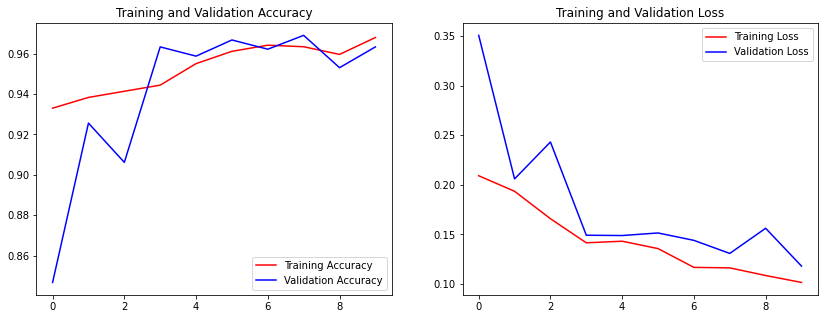

In [27]:
eval_plot(history)

In [ ]:
evaluate(model)

Found 874 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '



Confusion Matrix

[[264  15   5]
 [  5 285   0]
 [  4   4 292]]


Classification Report

              precision    recall  f1-score   support

        Rock       0.97      0.93      0.95       284
       Paper       0.94      0.98      0.96       290
    Scissors       0.98      0.97      0.98       300

    accuracy                           0.96       874
   macro avg       0.96      0.96      0.96       874
weighted avg       0.96      0.96      0.96       874



Using Convulutional Neural Network, we achieved 96% accuracy with 132s training execution time. Next, we will use transfer learning methods to increase the model accuracy.

## Transfer learning (using ResNet50)

In [35]:
base_model_resnet = tf.keras.applications.ResNet50V2(input_shape=(100, 150, 3),
                                               include_top=False,
                                               weights='imagenet')

94674944/94668760 [==============================] - 1s 0us/step


In [36]:
base_model_resnet.trainable = False

In [37]:
model_resnet = tf.keras.models.Sequential()
model_resnet.add(base_model_resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dropout(0.2))
model_resnet.add(tf.keras.layers.Dense(3, activation='softmax'))

In [38]:
model_resnet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [39]:
history_resnet = model_resnet.fit(train_generator,
      epochs=10,
      validation_data = validation_generator,
      callbacks=[learning_rate_reduction]
      ) 

Epoch 1/10
42/42 [==============================] - 101s 2s/step - loss: 1.0727 - accuracy: 0.8059 - val_loss: 0.0808 - val_accuracy: 0.9817
Epoch 2/10
42/42 [==============================] - 97s 2s/step - loss: 0.0675 - accuracy: 0.9829 - val_loss: 0.0310 - val_accuracy: 0.9943
Epoch 3/10
42/42 [==============================] - 97s 2s/step - loss: 0.0561 - accuracy: 0.9915 - val_loss: 0.0343 - val_accuracy: 0.9897
Epoch 4/10
42/42 [==============================] - 97s 2s/step - loss: 0.0543 - accuracy: 0.9888 - val_loss: 0.0378 - val_accuracy: 0.9943

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 5/10
42/42 [==============================] - 97s 2s/step - loss: 0.0681 - accuracy: 0.9885 - val_loss: 0.0197 - val_accuracy: 0.9954
Epoch 6/10
42/42 [==============================] - 97s 2s/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.0348 - val_accuracy: 0.9931
Epoch 7/10
42/42 [==============================] - 97s 2s/step - loss: 0.0230

## ResNet50V2 model evaluation

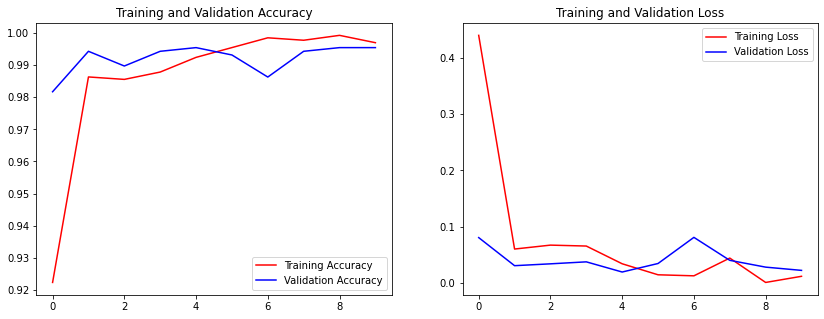

In [40]:
eval_plot(history_resnet)

In [41]:
evaluate(model_resnet)

Found 874 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '



Confusion Matrix

[[283   1   0]
 [  0 290   0]
 [  2   0 298]]


Classification Report

              precision    recall  f1-score   support

        Rock       0.99      1.00      0.99       284
       Paper       1.00      1.00      1.00       290
    Scissors       1.00      0.99      1.00       300

    accuracy                           1.00       874
   macro avg       1.00      1.00      1.00       874
weighted avg       1.00      1.00      1.00       874



## Transfer learning (using InceptionV3)

In [42]:
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(input_shape = (100, 150, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [43]:
for layer in base_model_inception.layers:
    layer.trainable = False

In [44]:
model_inception = tf.keras.models.Sequential()
model_inception.add(base_model_inception)
model_inception.add(tf.keras.layers.Flatten())
model_inception.add(tf.keras.layers.Dense(32, activation='relu'))
model_inception.add(tf.keras.layers.Dropout(0.2))
model_inception.add(tf.keras.layers.Dense(3, activation='softmax'))

In [47]:
model_inception.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [49]:
history_inception = model_inception.fit(train_generator,
      epochs=10,
      validation_data = validation_generator,
      callbacks=[learning_rate_reduction]
      ) 

Epoch 1/10
42/42 [==============================] - 56s 1s/step - loss: 0.6140 - accuracy: 0.8204 - val_loss: 0.1507 - val_accuracy: 0.9554
Epoch 2/10
42/42 [==============================] - 52s 1s/step - loss: 0.1831 - accuracy: 0.9437 - val_loss: 0.0989 - val_accuracy: 0.9771
Epoch 3/10
42/42 [==============================] - 52s 1s/step - loss: 0.1192 - accuracy: 0.9642 - val_loss: 0.0852 - val_accuracy: 0.9725
Epoch 4/10
42/42 [==============================] - 52s 1s/step - loss: 0.1187 - accuracy: 0.9635 - val_loss: 0.0801 - val_accuracy: 0.9805
Epoch 5/10
42/42 [==============================] - 52s 1s/step - loss: 0.0905 - accuracy: 0.9680 - val_loss: 0.0684 - val_accuracy: 0.9805
Epoch 6/10
42/42 [==============================] - 52s 1s/step - loss: 0.0859 - accuracy: 0.9764 - val_loss: 0.0759 - val_accuracy: 0.9794

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/10
42/42 [==============================] - 52s 1s/step - loss: 0.0681 

## InceptionV3 model evaluation

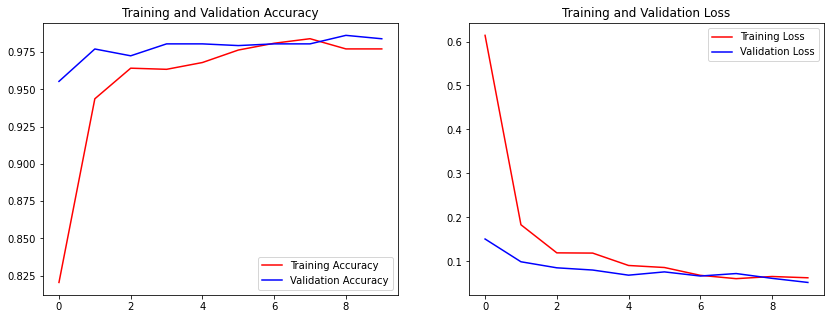

In [50]:
eval_plot(history_inception)

In [51]:
evaluate(model_inception)

Found 874 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '



Confusion Matrix

[[278   2   4]
 [  5 285   0]
 [  2   0 298]]


Classification Report

              precision    recall  f1-score   support

        Rock       0.98      0.98      0.98       284
       Paper       0.99      0.98      0.99       290
    Scissors       0.99      0.99      0.99       300

    accuracy                           0.99       874
   macro avg       0.99      0.98      0.99       874
weighted avg       0.99      0.99      0.99       874



## Predicting new image

Based on model accuracy, we will use ResNet50V2 model to predict new image as it has the highest accuracy compared to CNN and InceptionV3.

In [52]:
def predict_image(image_upload, model = model_resnet):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 100, 150, 3])

  predict_proba = sorted(model.predict(im_input)[0])[2]
  predict_class = np.argmax(model.predict(im_input))

  if predict_class == 0:
      predict_label = 'Paper'
  elif predict_class == 1:
      predict_label = 'Rock'
  else:
      predict_label = 'Scissor'

  print('\n')
  plt.show()
  print("\nImage prediction result: ", predict_label)
  print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

Saving male-hand-clenched-fist-white_99433-2771.jpg to male-hand-clenched-fist-white_99433-2771.jpg




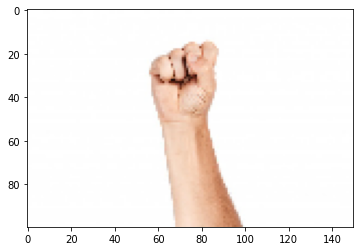


Image prediction result:  Rock
Probability:  100.0 %




In [53]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

Saving download.jpg to download.jpg




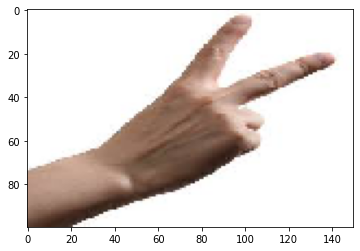


Image prediction result:  Scissor
Probability:  100.0 %




In [55]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

Saving depositphotos_39788169-stock-photo-empty-open-woman-hand-on.jpg to depositphotos_39788169-stock-photo-empty-open-woman-hand-on.jpg




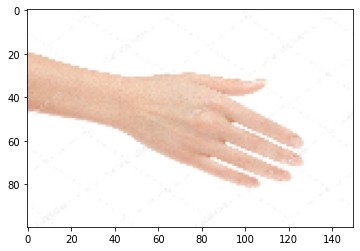


Image prediction result:  Paper
Probability:  100.0 %




In [59]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])

predict_image(img)

## Conclusion

Best model: Resnet50V2

Accuracy: 99%